In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_img1, train_labels1), (test_img1, test_labels1) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


400 training, 200 validation and 200 testing.

In [3]:
train_count = 40000
valid_count = 10000
test_count = 10000
num_classes = 10

## select datasets up to the count defined above
train_img, train_labels = train_img1[0:train_count], train_labels1[0:train_count]
valid_img, valid_labels = train_img1[train_count: train_count + valid_count], train_labels1[train_count: train_count + valid_count]
test_img, test_labels = test_img1[0:test_count], test_labels1[0:test_count]

# Normalize pixel values to be between 0 and 1
# train_img, valid_img, test_img = train_img / 255.0, valid_img / 255.0 , test_img / 255.0

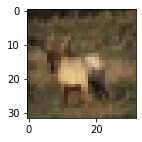

In [9]:
plt.figure(figsize=(2,2))
plt.imshow(train_img[3])

In [11]:
 train_img, valid_img, test_img = train_img / 255.0, valid_img / 255.0 , test_img / 255.0

In [14]:
test_labels = test_labels.reshape(-1,)
valid_labels = valid_labels.reshape(-1,)
train_labels = train_labels.reshape(-1,)

In [6]:

def run_model(filters, neurons_1st, neurons_2nd , epochs, learning_rate, trainx, trainy, validx, validy, testx, testy, images_shape=(32,32,3)):
  cnn_model = models.Sequential()
  cnn_model.add(layers.Conv2D(filters=filters, kernel_size =(3, 3), activation='relu', input_shape=images_shape))
  cnn_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  cnn_model.add(layers.Flatten())
  cnn_model.add(layers.Dense(neurons_1st, activation='relu'))
  cnn_model.add(layers.Dense(neurons_2nd,  activation="softmax"))

  cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# cnn_model_params = cnn_model.fit(train_img, train_labels, batch_size=32, epochs=10, validation_data=(valid_img, valid_labels))

  cnn_model_params = cnn_model.fit(trainx, trainy, epochs=epochs, validation_data=(validx, validy))

  test_loss, test_acc = cnn_model.evaluate(testx,  testy, verbose=2)
  
  return cnn_model, cnn_model_params , (test_loss, test_acc)

In [16]:
cifar_model, cifar_history, test_history = run_model(32,132,10,20,1e-3,train_img, train_labels, valid_img, valid_labels, test_img, test_labels)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1250/1250 [==============================] - 37s 6ms/step - loss: 1.5024 - accuracy: 0.4611 - val_loss: 3.1670 - val_accuracy: 0.1016
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.2008 - accuracy: 0.5764 - val_loss: 3.1934 - val_accuracy: 0.1016
Epoch 3/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0844 - accuracy: 0.6175 - val_loss: 3.6505 - val_accuracy: 0.0952
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.0046 - accuracy: 0.6478 - val_loss: 3.9426 - val_accuracy: 0.0952
Epoch 5/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9355 - accuracy: 0.6707 - val_loss: 3.5960 - val_accuracy: 0.0952
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8770 - accuracy: 0.6927 - val_loss: 3.8501 - val_accuracy: 0.0952
Epoch 7/20
1250/1250 [==============================] - 7s 6ms/step - loss: 0.8155 - accuracy: 0.7162 - val_loss: 3.5158 - val_accuracy: 0.1016
Ep

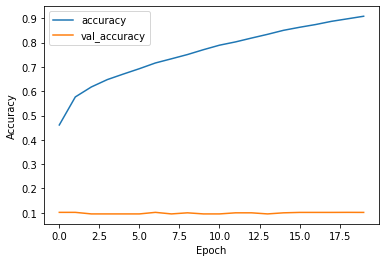

In [17]:
plt.plot(cifar_history.history['accuracy'], label='accuracy')
plt.plot(cifar_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Fashion-MNIST

In [2]:
(train_img1, train_labels1), (test_img1, test_labels1) = datasets.fashion_mnist.load_data()
train_count = 50000
valid_count = 10000
test_count = 10000
num_classes = 10

## select datasets up to the count defined above
train_img, train_labels = train_img1[0:train_count], train_labels1[0:train_count]
valid_img, valid_labels = train_img1[train_count: train_count + valid_count], train_labels1[train_count: train_count + valid_count]
test_img, test_labels = test_img1[0:test_count], test_labels1[0:test_count]


4431872/4422102 [==============================] - 0s 0us/step


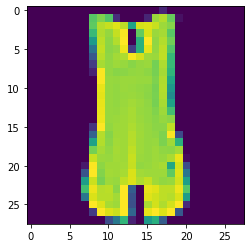

In [3]:
plt.imshow(train_img[4])

In [4]:
## reshape data into (28, 28, 1)
train_img = train_img.reshape(train_count, 28, 28, 1)
valid_img = valid_img.reshape(valid_count, 28, 28, 1)
test_img = test_img.reshape(test_count, 28, 28, 1)

In [7]:
mnist_model, mnist_history, test_history = run_model(32,132,10,20,1e-3,train_img, train_labels, valid_img, valid_labels, test_img, test_labels, images_shape=(28,28,1))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1563/1563 [==============================] - 39s 6ms/step - loss: 1.0117 - accuracy: 0.8412 - val_loss: 0.3517 - val_accuracy: 0.8779
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2938 - accuracy: 0.8941 - val_loss: 0.3317 - val_accuracy: 0.8843
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2527 - accuracy: 0.9083 - val_loss: 0.3360 - val_accuracy: 0.8843
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2264 - accuracy: 0.9163 - val_loss: 0.3235 - val_accuracy: 0.8927
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2078 - accuracy: 0.9225 - val_loss: 0.3470 - val_accuracy: 0.8910
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1892 - accuracy: 0.9297 - val_loss: 0.3702 - val_accuracy: 0.8958
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1764 - accuracy: 0.9360 - val_loss: 0.3864 - val_accuracy: 0.8951
Ep

In [8]:
### test accuracy
test_history[1]

0.885200023651123

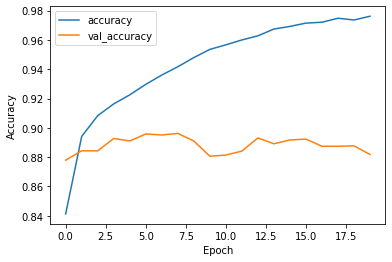

In [10]:
plt.plot(mnist_history.history['accuracy'], label='accuracy')
plt.plot(mnist_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

looking the grpahs for both these models we see that accuracy increases with each epochs. 

Cifar's accuracy starts from 0.46 whereas fashion mnist accuracy starts from 0.84 when using just a 1 convulation + pooling layer. 

Validation of Cifar's data performed poorly where as validation for fashion mnist reolved around 0.88 which is much better.

It seems due to the images being coloured in case of cifar, model validation performed poorly. model was overfitted in this case. maybe using a more sophisticated model either by increasing the c+p layer, or using batch normalization, or using neurons dropout might increasing the validation accuracy and will not overfit the model

in case of fashion mnist, since the images were grayscaled, using the simple model was enough to classify the images. increasing the complexity might only increasing the accuracy by few amount.